In [40]:
from ipynb.fs.full.gbs import *

In [41]:
from scipy.stats import norm

distr = norm()
reals = distr.rvs(size=(50,100))
imags = distr.rvs(size=(50,100))
print(reals + 1j * imags)

[[0.539-1.832j 1.200+1.535j 0.357+0.276j ... 0.608-0.468j -0.042-1.639j
  0.616+1.007j]
 [1.200-0.745j 0.552+0.570j -0.126-1.061j ... -0.600-0.393j 0.207+0.810j
  0.142-0.659j]
 [0.541+1.190j -0.921-1.255j -0.310+0.033j ... 0.423+0.757j 0.098-1.709j
  0.032+1.584j]
 ...
 [-1.411+1.888j -1.128-1.819j 0.506-0.354j ... -2.017-0.042j
  -0.967+0.330j 0.372+0.288j]
 [-0.305-1.367j -2.183-0.099j 0.329-0.575j ... -0.947+0.458j
  -0.622+1.301j -0.696+0.454j]
 [-1.130+2.197j -2.340+0.315j -0.008+1.027j ... -1.079-1.399j
  1.346+1.851j -0.872+1.000j]]


In [42]:
arr = zpf(1000, 2, 1)
# %timeit np.trace(arr.T @ arr) 
# %timeit np.trace(arr @ arr.T)
# %timeit np.trace((arr @ arr.T if arr.shape[0] < arr.shape[1] else arr.T @ arr)) # fastest
print(np.trace(arr.T @ arr), np.trace(arr @ arr.T))

# Output:
# 10.1 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# 15 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
# 12.7 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

(55.45495460633254-23.590994090843335j) (55.4549546063326-23.590994090843367j)


In [43]:
print(np.eye(2) * np.ones((2,2)))           # elementwise product
print(np.eye(2) @ np.ones((2,2)))           # matrix product
print(np.kron(np.eye(2), np.ones((2,2))))   # kronecker product

[[1. 0.]
 [0. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


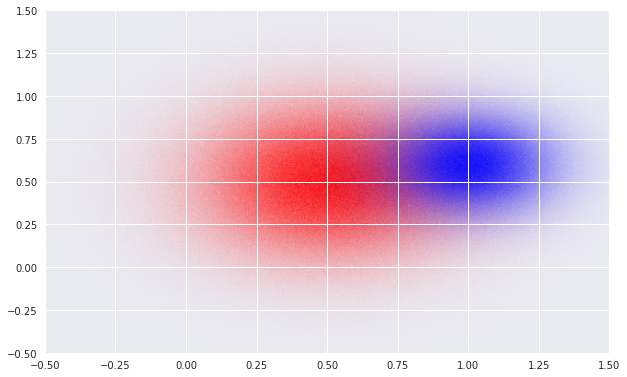

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

n = 10000000

x = np.random.normal(0.5, 0.3, n)
y = np.random.normal(0.5, 0.3, n)

ax.scatter_density(x, y, color='red')

x = np.random.normal(1.0, 0.2, n)
y = np.random.normal(0.6, 0.2, n)

ax.scatter_density(x, y, color='blue')

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

fig.savefig('double.png')

In [45]:
def plot_scatter(x, y, color='blue', savefile=False, poly_regr_deg=None):

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

    ax.scatter_density(x, y, color=color)

    fit=None
    if poly_regr_deg:
        p = P.fit(x, y, poly_regr_deg, window=[np.min(x), np.max(x)])
        xx, yy = p.linspace()
        ax.plot(xx, yy, lw=2)
        at = AnchoredText(
            str(p), prop=dict(size=15), frameon=True, loc='upper left')
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        fit = p
    
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y), np.max(y))

    if savefile:
        fig.savefig(savefile)

    return fit

In [46]:
def plot_complex(arr, **kwargs):
    plot_scatter(np.real(arr), np.imag(arr), **kwargs)

In [47]:
a,b = ent(N=1000000, r=1, t=2, phase=0)

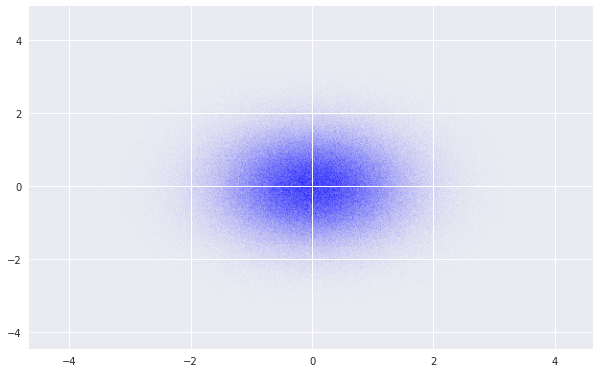

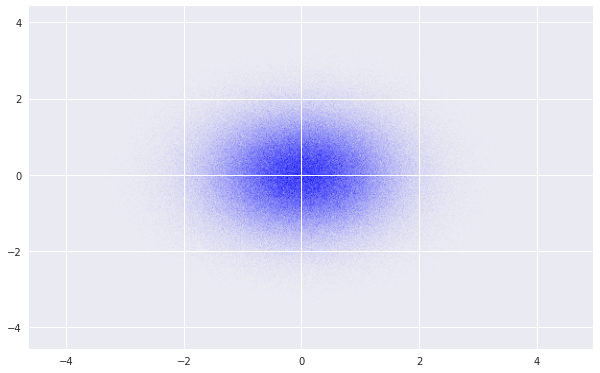

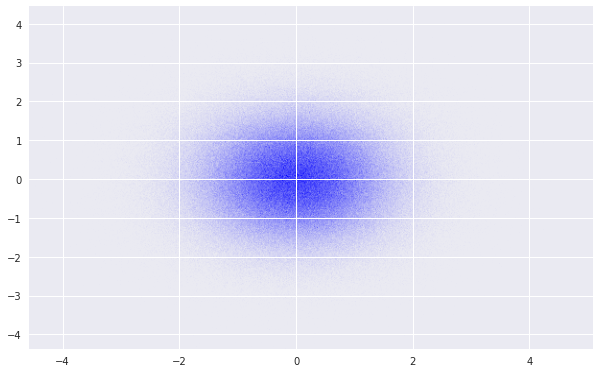

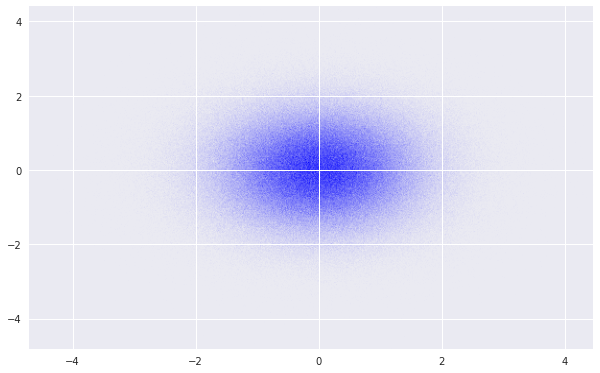

In [48]:
plot_complex(a[0,:])
plot_complex(a[1,:])
plot_complex(b[0,:])
plot_complex(b[1,:])

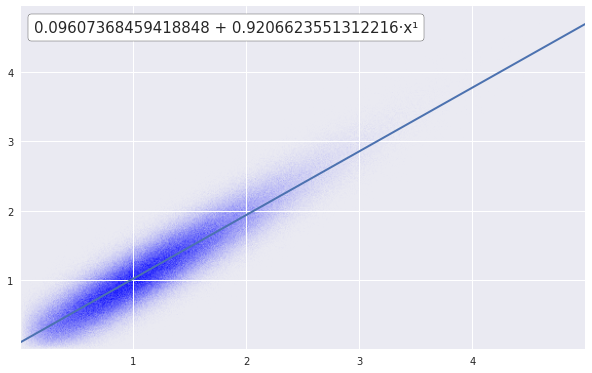

In [49]:
x = np.abs(a[0,:])
y = np.abs(b[1,:])

p = plot_scatter(x, y, poly_regr_deg=1, savefile='hv_vh_entangled.png')

In [50]:
print(p)
print(p(0))
xx, yy = p.linspace()
print(xx[:10])
print(yy[:10])
print(p(xx[:10]))

0.09607368459418848 + 0.9206623551312216·x¹
0.09607368459418848
[0.00125025 0.05172213 0.102194   0.15266588 0.20313776 0.25360963
 0.30408151 0.35455339 0.40502526 0.45549714]
[0.09722475 0.1436923  0.19015986 0.23662741 0.28309497 0.32956253
 0.37603008 0.42249764 0.4689652  0.51543275]
[0.09722475 0.1436923  0.19015986 0.23662741 0.28309497 0.32956253
 0.37603008 0.42249764 0.4689652  0.51543275]


In [51]:
print(p)
print(p(0))
print(p(1)-p(0))
print(p(2)-p(1))

0.09607368459418848 + 0.9206623551312216·x¹
0.09607368459418848
0.9206623551312216
0.9206623551312216


In [52]:
a,b = ent(N=1000000, r=1, t=2, phase=0)
np.set_printoptions(formatter={'complex_kind': '{:.3f}'.format})
#print(np.cov(a,b),2)
print(np.corrcoef(a,b))
#print(np.cov(a[0,:],b[0,:]))
print(np.corrcoef(a[0,:],b[0,:]))
#print(np.cov(a[0,:],b[1,:]))
print(np.corrcoef(a[0,:],b[1,:]))
#print(np.cov(a[1,:],b[0,:]))
print(np.corrcoef(a[1,:],b[0,:]))
#print(np.cov(a[1,:],b[1,:]))
print(np.corrcoef(a[1,:],b[1,:]))

# 0.5, 1.88, 13.66, 100.9, 745.66, 5501
# plot_scatter(np.linspace(0,5,6), [0.5, 1.88, 13.66, 100.9, 745.66, 5501], poly_regr_deg=5)


[[1.000+0.000j -0.000-0.000j -0.000-0.000j 0.003+0.000j]
 [-0.000+0.000j 1.000+0.000j 0.001-0.001j -0.000+0.000j]
 [-0.000+0.000j 0.001+0.001j 1.000+0.000j 0.000-0.000j]
 [0.003-0.000j -0.000-0.000j 0.000+0.000j 1.000+0.000j]]
[[1.000+0.000j -0.000-0.000j]
 [-0.000+0.000j 1.000+0.000j]]
[[1.000+0.000j 0.003+0.000j]
 [0.003-0.000j 1.000+0.000j]]
[[1.000+0.000j 0.001-0.001j]
 [0.001+0.001j 1.000+0.000j]]
[[1.000+0.000j -0.000+0.000j]
 [-0.000-0.000j 1.000+0.000j]]
